# Personalize Oncology

In [2]:
from IPython.display import IFrame
IFrame(src="https://terra.bio/the-molecular-oncology-almanac-from-algorithm-to-analysis-portal/", width='100%', height='500px')

Certain type of Cancer was suggested (Melanoma). We will leverage Molecular Oncology Almanac Search platform from Verely: https://terra.bio/the-molecular-oncology-almanac-from-algorithm-to-analysis-portal/ 
        to explore potential available therapies suggested for different mutations

In [3]:
from IPython.display import IFrame
IFrame(src="https://moalmanac.org/search?s=%22Melanoma%22%5Bdisease%5D", width='100%', height='400px')

Explore personal Genome for mutations 
* Use GDC Data portal - https://portal.gdc.cancer.gov/
    * Explore all specific mutations whoich might be present in patient genome - https://portal.gdc.cancer.gov/ssms/92469838-fc8e-5a01-af9f-10268c739bb3
        * Find Rs number in dbSNP - https://www.ncbi.nlm.nih.gov/snp/rs121913513
        * find mutation details in Snpedia - https://www.snpedia.com/index.php/Rs121913513

In [15]:
from IPython.display import IFrame
IFrame(src="https://www.snpedia.com/index.php/Rs121913513", width='100%', height='400px')

Search in patient genome for mutations

In [9]:
!head -50 AncestryDNAtest.txt

#AncestryDNA raw data download
#This file was generated by AncestryDNA at: 10/20/2020 22:03:06 UTC
#Data was collected using AncestryDNA array version: V2.0
#Data is formatted using AncestryDNA converter version: V1.0
#Below is a text version of your DNA file from Ancestry.com DNA, LLC.  THIS 
#INFORMATION IS FOR YOUR PERSONAL USE AND IS INTENDED FOR GENEALOGICAL RESEARCH 
#ONLY.  IT IS NOT INTENDED FOR MEDICAL, DIAGNOSTIC, OR HEALTH PURPOSES.  THE EXPORTED DATA IS 
#SUBJECT TO THE ANCESTRY TERMS AND CONDITIONS, BUT PLEASE BE AWARE THAT THE 
#DOWNLOADED DATA WILL NO LONGER BE PROTECTED BY OUR SECURITY MEASURES.
#WHEN YOU DOWNLOAD YOUR RAW DNA DATA, YOU ASSUME ALL RISK OF STORING, 
#SECURING AND PROTECTING YOUR DATA.  FOR MORE INFORMATION, SEE ANCESTRYDNA FAQS. 
#
#Genetic data is provided below as five TAB delimited columns.  Each line 
#corresponds to a SNP.  Column one provides the SNP identifier (rsID where 
#possible).  Columns two and three contain the chromosome and basepair posi

In [4]:
!grep 'rs121913513' AncestryDNAtest.txt

rs121913513	4	55593661	T	T


## If mutation found for a patient than oncologist might want to explore proposed therapy

# Non-oncology drugs pepurposing

# Drug Repurposing via disease-compounds relations
This example shows how to do drug repurposing using DRKG even with the pretrained model.

This can be used to detect Medical claim fraud when claim does not pass the check "symptopms-disease-prescribed medication" 

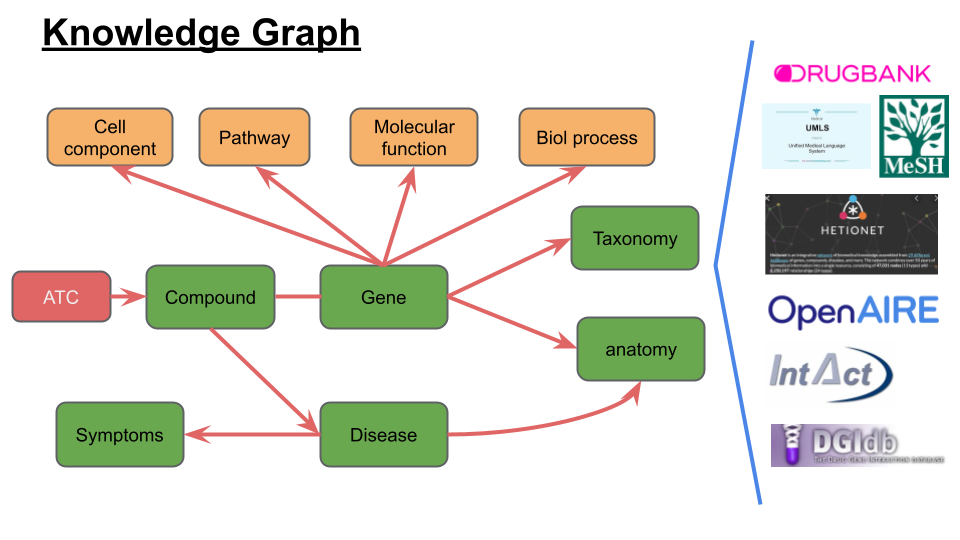

In [1]:
from IPython.display import Image
Image(filename='./kg.png', width = 500, height = 300) 

## Collecting related disease
At the very beginning we need to collect a list of disease in DRKG. 
We can easily use the Disease ID that DRKG uses for encoding the disease. 
References: 
    
    https://meshb.nlm.nih.gov/search?searchInField=allTerms&sort=&size=20&searchType=anyWord&searchMethod=FullWord&q=Macular%20Degeneration
    
    https://go.drugbank.com/drugs/DB00536
    
    https://en.wikipedia.org/wiki/Aging-associated_diseases
        
    https://www.verywellhealth.com/age-related-diseases-2223996
            
Here we take all of the age-related disease as target:
    
    1. Aging - D000375 -index not excepted
    
    2. Age-Related Macular Degeneration (AMD) - D008268 
        SNP- 
                https://pubmed.ncbi.nlm.nih.gov/27099955/ 
        
                https://jamanetwork.com/journals/jamaophthalmology/fullarticle/2514061
                https://www.snpedia.com/index.php/Rs1061170
                https://www.snpedia.com/index.php/Rs10490924
                    ....
    
    3. Cataracts - D002386
    
    4. Glaucoma - D005901
    
    5. Chronic Obstructive Pulmonary Disease - D029424
    
    6. Atherosclerosis - D003324
    
    7. Cardiovascular disease - D002318
    
    8. Stroke - D020521
    
    9. Heart Diseases - D006331
    
    10. Hypertension - D006973
    
    11. Hypertension, Pulmonary - D006976
    
    12. Myocardial Ischemia - D017202
    
    13. Brain Ischemia - D002545
    
    14. Cancer (Neoplasms) - D009369
    
    15. Colorectal Neoplasms - D003123
    
    16. Arthritis - D001172
    
    17. Spondylarthritis - D025241
    
    18. Osteoarthritis - D010003
    
    19. Osteoporosis - D010024 
    
    20. Diabetes Mellitus - D003920
    
    21. Diabetes Mellitus, Type 2 - D003924
    
    22. Alzheimer's disease - D000544
    
    23. Dementia - D003704
    
    24. Frontotemporal disorders (Frontotemporal Dementia) - D057180
    
    25. Lewy body dementia - D020961
    
    26. Huntington's disease - D006816
    
    27. Parkinson's Disease - D010300
    
    28. Frontotemporal Lobar Degeneration - D057174
    
    29. Benign Prostatic Hyperplasia - D011470 
    
    30. Overactive Bladder - D053201
    
    31. Gallbladder Diseases - D005705
    
    32. Presbycusis (Gradual bilateral hearing loss associated with aging) - D011304 -this index not excepted
    
    

In [56]:
Aging_disease_list = [
'Disease::MESH:D008268',
'Disease::MESH:D002386',
'Disease::MESH:D005901',
'Disease::MESH:D029424',
'Disease::MESH:D003324',
'Disease::MESH:D002318',
'Disease::MESH:D020521',
'Disease::MESH:D006331',
'Disease::MESH:D006973',
'Disease::MESH:D006976',
'Disease::MESH:D017202',
'Disease::MESH:D002545',
'Disease::MESH:D009369',
'Disease::MESH:D003123',
'Disease::MESH:D001172',
'Disease::MESH:D025241',
'Disease::MESH:D010003',
'Disease::MESH:D010024',
'Disease::MESH:D003920',
'Disease::MESH:D003924',
'Disease::MESH:D000544',
'Disease::MESH:D003704',
'Disease::MESH:D057180',
'Disease::MESH:D020961',
'Disease::MESH:D006816',
'Disease::MESH:D010300',
'Disease::MESH:D057174',
'Disease::MESH:D011470',
'Disease::MESH:D053201',
'Disease::MESH:D005705'
]

In [57]:
# Aging_disease_list = ['Disease::MESH:D010003']

In [58]:
# Aging_disease_list = ['Disease::MESH:D000544']

We are now will explore drug repositioning for Melonoma - https://meshb.nlm.nih.gov/record/ui?ui=D008545

In [59]:
Aging_disease_list = ['Disease::MESH:D008545']

## Candidate drugs
Now we use FDA-approved drugs in Drugbank as candidate drugs. (we exclude drugs with molecule weight < 250) The drug list is in infer\_drug.tsv

In [60]:
import csv

# Load entity file
drug_list = []
with open("./infer_drug.tsv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['drug','ids'])
    for row_val in reader:
        drug_list.append(row_val['drug'])

In [61]:
len(drug_list)

8104

## Treatment relation

Two treatment relations in this context

In [62]:
treatment = ['Hetionet::CtD::Compound:Disease','GNBR::T::Compound:Disease']

## Get pretrained model
We can directly use the pretrianed model to do drug repurposing.

In [63]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '../utils')
from utils import download_and_extract
download_and_extract()

In [64]:
entity_idmap_file = '../data/drkg/embed/entities.tsv'
relation_idmap_file = '../data/drkg/embed/relations.tsv'

In [65]:
entity_idmap_file = '../data/embed/entities.tsv'
relation_idmap_file = '../data/embed/relations.tsv'

## Get embeddings for diseases and drugs

In [66]:
# Get drugname/disease name to entity ID mappings
entity_map = {}
entity_id_map = {}
relation_map = {}
with open(entity_idmap_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name','id'])
    for row_val in reader:
        entity_map[row_val['name']] = int(row_val['id'])
        entity_id_map[int(row_val['id'])] = row_val['name']
        
with open(relation_idmap_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name','id'])
    for row_val in reader:
        relation_map[row_val['name']] = int(row_val['id'])
        
# handle the ID mapping
drug_ids = []
disease_ids = []
for drug in drug_list:
    drug_ids.append(entity_map[drug])
    
for disease in Aging_disease_list:
    disease_ids.append(entity_map[disease])

treatment_rid = [relation_map[treat]  for treat in treatment]

In [67]:
# Load embeddings
import torch as th
entity_emb = np.load('../data/drkg/embed/DRKG_TransE_l2_entity.npy')
rel_emb = np.load('../data/drkg/embed/DRKG_TransE_l2_relation.npy')

drug_ids = th.tensor(drug_ids).long()
disease_ids = th.tensor(disease_ids).long()
treatment_rid = th.tensor(treatment_rid)

drug_emb = th.tensor(entity_emb[drug_ids])
treatment_embs = [th.tensor(rel_emb[rid]) for rid in treatment_rid]

## Drug Repurposing Based on Edge Score
We use following algorithm to calculate the edge score. Note, here we use logsigmiod to make all scores < 0. The larger the score is, the stronger the $h$ will have $r$ with $t$.

$\mathbf{d} = \gamma - ||\mathbf{h}+\mathbf{r}-\mathbf{t}||_{2}$

$\mathbf{score} = \log\left(\frac{1}{1+\exp(\mathbf{-d})}\right)$

When doing drug repurposing, we only use the treatment related relations.

In [68]:
import torch.nn.functional as fn

gamma=12.0
def transE_l2(head, rel, tail):
    score = head + rel - tail
    return gamma - th.norm(score, p=2, dim=-1)

scores_per_disease = []
dids = []
for rid in range(len(treatment_embs)):
    treatment_emb=treatment_embs[rid]
    for disease_id in disease_ids:
        disease_emb = entity_emb[disease_id]
        score = fn.logsigmoid(transE_l2(drug_emb, treatment_emb, disease_emb))
        scores_per_disease.append(score)
        dids.append(drug_ids)
scores = th.cat(scores_per_disease)
dids = th.cat(dids)


In [69]:
# sort scores in decending order
idx = th.flip(th.argsort(scores), dims=[0])
scores = scores[idx].numpy()
dids = dids[idx].numpy()

### Now we output proposed treatments

In [70]:
_, unique_indices = np.unique(dids, return_index=True)
topk=100
topk_indices = np.sort(unique_indices)[:topk]
proposed_dids = dids[topk_indices]
proposed_scores = scores[topk_indices]

Now we list the pairs of in form of (drug, treat, disease, score) 

We select top K relevent drugs according the edge score

In [71]:
for i in range(topk):
    drug = int(proposed_dids[i])
    score = proposed_scores[i]
    
    print("{}\t{}".format(entity_id_map[drug], score))

Compound::DB00515	-0.10456792265176773
Compound::DB09107	-0.11128311604261398
Compound::DB08894	-0.11279210448265076
Compound::DB00441	-0.11503596603870392
Compound::DB00997	-0.11634162813425064
Compound::DB11672	-0.11968539655208588
Compound::DB01229	-0.12061229348182678
Compound::DB00675	-0.12224452942609787
Compound::DB00877	-0.12437762320041656
Compound::DB11890	-0.12975651025772095
Compound::DB00755	-0.13055695593357086
Compound::DB06159	-0.1350637972354889
Compound::DB00563	-0.14131759107112885
Compound::DB04786	-0.14245563745498657
Compound::DB11678	-0.1453392207622528
Compound::DB00290	-0.14617787301540375
Compound::DB01234	-0.1529041975736618
Compound::DB01181	-0.15405192971229553
Compound::DB00958	-0.1550951600074768
Compound::DB04106	-0.15705730020999908
Compound::DB00570	-0.15721775591373444
Compound::DB00773	-0.15808223187923431
Compound::DB00305	-0.15916049480438232
Compound::DB00143	-0.16185718774795532
Compound::DB12983	-0.16363579034805298
Compound::DB13811	-0.16527362

### Check Clinial Trial Drugs
There are several clinial trial drugs hit in top 100. (Note: Ribavirin exists in DRKG as a treatment for SARS).
We need change this list to Kauffman protocol

In [72]:
clinical_drugs_file = './Disease_clinical_trial_drugs.tsv'
clinical_drug_map = {}
with open(clinical_drugs_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['id', 'drug_name','drug_id'])
    for row_val in reader:
        clinical_drug_map[row_val['drug_id']] = row_val['drug_name']
        
for i in range(topk):
    drug = entity_id_map[int(proposed_dids[i])][10:17]
    if clinical_drug_map.get(drug, None) is not None:
        score = proposed_scores[i]
        print("[{}]\t{}\t{}".format(i, clinical_drug_map[drug],score , proposed_scores[i]))

[5]	Curcumin	-0.11968539655208588
[31]	EGCG	-0.173793762922287
[40]	Quercetin	-0.18056678771972656
[64]	Hydroxychloroquine	-0.2167699933052063
[74]	Melatonin	-0.22435645759105682
[84]	Methylprednisolone	-0.23988288640975952


In [34]:
len(clinical_drug_map)

34

# Non-oncology drugs pepurposing
Verely (TerraBio) found that large number of non-oncology drugs selectively inhibited subsets of cancer cell lines in a manner predictable from the cell lines’ molecular features - https://terra.bio/paper-spotlight-discovering-the-anticancer-potential-of-non-oncology-drugs/?utm_source=Terra+App&utm_campaign=018bbc2576-Mar-Apr22_newsletter&utm_medium=email&utm_term=0_ea2ec28eda-018bbc2576-1319556874&ct=t(03/01-04/30_2022)&mc_cid=018bbc2576&mc_eid=546f35b1cb

In [8]:
from IPython.display import IFrame
IFrame(src="https://depmap.org/repurposing/", width='100%', height='400px')

In [3]:
from IPython.display import IFrame
IFrame(src="https://www.melatonin-research.net/index.php/MR/article/view/81#:~:text=These%20data%20support%20the%20observed,immunometabolic%20adjuvant%20for%20melanoma%20therapy.", width='100%', height='400px')

In [5]:
from IPython.display import IFrame
IFrame(src="https://www.webmd.com/melanoma-skin-cancer/news/20050711/curry-spice-fight-skin-cancer#:~:text=A%20new%20study%20shows%20that,treat%20form%20of%20skin%20cancer.", width='100%', height='400px')

In [7]:
from IPython.display import IFrame
IFrame(src="https://www.sciencedirect.com/science/article/pii/S075333222030175X", width='100%', height='400px')

In [156]:
ls

coronavirus-related-host-genes.tsv         Disease_clinical_trial_drugs.tsv
COVID19_clinical_trial_drugs.tsv           Disease_drug_repurposing.ipynb
COVID-19_drug_repurposing.ipynb            infer_drug.tsv
COVID-19_drug_repurposing_via_genes.ipynb  Readme.md
covid19-host-genes.tsv


In [157]:
pwd

'/home/jupyter/DRKG/drug_repurpose'

In [158]:
cd ..

/home/jupyter/DRKG


In [159]:
cd ..

/home/jupyter


In [160]:
ls

DRKG/  drkg-zip/  tutorials/  Untitled.ipynb


In [165]:
!sudo tar -czvf DRKG.tar.gz ./DRKG

./DRKG/
./DRKG/licenses/
./DRKG/licenses/Readme.md
./DRKG/LICENSE
./DRKG/.git/
./DRKG/.git/hooks/
./DRKG/.git/hooks/pre-applypatch.sample
./DRKG/.git/hooks/pre-receive.sample
./DRKG/.git/hooks/applypatch-msg.sample
./DRKG/.git/hooks/prepare-commit-msg.sample
./DRKG/.git/hooks/commit-msg.sample
./DRKG/.git/hooks/pre-commit.sample
./DRKG/.git/hooks/pre-push.sample
./DRKG/.git/hooks/pre-rebase.sample
./DRKG/.git/hooks/update.sample
./DRKG/.git/hooks/post-update.sample
./DRKG/.git/logs/
./DRKG/.git/logs/refs/
./DRKG/.git/logs/refs/remotes/
./DRKG/.git/logs/refs/remotes/origin/
./DRKG/.git/logs/refs/remotes/origin/HEAD
./DRKG/.git/logs/refs/heads/
./DRKG/.git/logs/refs/heads/master
./DRKG/.git/logs/HEAD
./DRKG/.git/refs/
./DRKG/.git/refs/remotes/
./DRKG/.git/refs/remotes/origin/
./DRKG/.git/refs/remotes/origin/HEAD
./DRKG/.git/refs/heads/
./DRKG/.git/refs/heads/master
./DRKG/.git/refs/tags/
./DRKG/.git/branches/
./DRKG/.git/objects/
./DRKG/.git/objects/info/
./DRKG/.git/objects/pack/
./DRKG

In [166]:
ls

DRKG/  DRKG.tar.gz  drkg-zip/  tutorials/  Untitled.ipynb


In [167]:
!sudo tar -czvf drkg-zip.tar.gz ./drkg-zip

./drkg-zip/
./drkg-zip/embed/
./drkg-zip/embed/mol_edgepred.npy
./drkg-zip/embed/mol_infomax.npy
./drkg-zip/embed/entities.tsv
./drkg-zip/embed/._relations.tsv
./drkg-zip/embed/Readme.md
./drkg-zip/embed/mol_masking.npy
./drkg-zip/embed/relations.tsv
./drkg-zip/embed/DRKG_TransE_l2_relation.npy
./drkg-zip/embed/mol_contextpred.npy
./drkg-zip/embed/DRKG_TransE_l2_entity.npy
./drkg-zip/embed/._entities.tsv
./drkg-zip/drkg.tar
./drkg-zip/._relation_glossary.tsv
./drkg-zip/._embed
./drkg-zip/entity2src.tsv
./drkg-zip/._entity2src.tsv
./drkg-zip/drkg.tsv
./drkg-zip/._drkg.tsv
./drkg-zip/relation_glossary.tsv
